In [ ]:
"""
帕累托分析
    贡献度分析—>帕累托法则：20/80定律
    
    原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来讲，投入和努力可以分为两种不同的类型：
    
    多数，他们只能造成少数的影响；少数，它们造成主要的、重大的影响。
    
    一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润。
例如：
    世界上大约80%的资源是由世界上15%的人口所耗尽的。
    世界财富的80%为25%的人所拥有；在一个国家的医疗体系中20%的人口与20%的疾病，会耗费80%的医疗资源。
    
    一个思路，通过二八原则，去寻找关键的那20%决定性因素。

"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A    1573.306590
B    3082.273787
C    2514.769821
D    1867.055758
E     698.549263
F    2420.820263
G    1842.250735
H    3265.249057
I    2265.081777
J    4866.744235
dtype: float64
-----------------------
J    4866.744235
H    3265.249057
B    3082.273787
C    2514.769821
F    2420.820263
I    2265.081777
D    1867.055758
G    1842.250735
A    1573.306590
E     698.549263
dtype: float64
超过80%累计占比的节点值索引为： D
超过80%累计占比的节点值索引位置为： 6
---------------------------


AttributeError: Unknown property hold

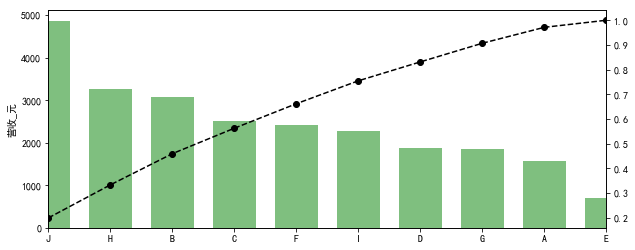

In [14]:
# 帕累托分析

data = pd.Series(np.random.randn(10)*1200+3000,
                index=list('ABCDEFGHIJ'))
print(data)
print('-----------------------')
    # 创建数据，10个品类产品的销售额

data.sort_values(ascending=False,inplace=True)   # 由大到小排列

print(data)

plt.rcParams['font.sans-serif'] = ['SimHei']  
    # Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False    
    # 解决Matplotlib坐标轴负号'-'显示为方块的问题
    
plt.figure(figsize=(10,4))
data.plot(kind='bar',color='g',alpha=0.5,width=0.7)
plt.ylabel('营收_元')
    # 创建营收柱状图

    
p = data.cumsum()/data.sum()   # 创建累计占比,Series
key = p[p>0.8].index[0]
key_num = data.index.tolist().index(key)
print('超过80%累计占比的节点值索引为：',key)
print('超过80%累计占比的节点值索引位置为：',key_num)
print('---------------------------')
    # 找到累计占比超过80%时候的index
    # 找到key所对应的索引位置

p.plot(style = '--ko',secondary_y=True)   # secondary_y    y副坐标轴

#plt.axvline(key_num,hold=None,color='r',linestyle='--',alpha=0.8)
plt.axvline(key_num,hold=None,color='r',linestyle="--",alpha=0.8)  

plt.text(key_num+0.2,p[key],'累计占比为:%.3f%%'%(p[key]*100),color='r')   # 累计占比超过80%的节点
plt.ylabel('营收_比例')
    # 绘制营收累计占比曲线
    
key_product = data.loc[:key]
print('核心产品为:',key_product)
    # 输出决定性因素产品
